**Loading and Preparing Data**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Cpy Datasets/train.csv')
data

,unique ID,query_text,category
0,0,HTTPS://VIMEO.COM/107297364﻿,junk
1,1,Art and Culture,general
2,2,Differentiate between chemical and biological ...,academic_servable
3,3,nth Term of an AP,academic_servable
4,4,bunmei kaika: aoiza ibunroku saien,junk
...,...,...,...
4995,4995,Under what conditions do we make septic tanks?,academic_servable
4996,4996,PSUS,general
4997,4997,Let's Travel Together Test - 1,general
4998,4998,"The given angle is - 240°. We know that, π=18...",academic_non_servable


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unique ID   5000 non-null   int64 
 1   query_text  5000 non-null   object
 2   category    5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


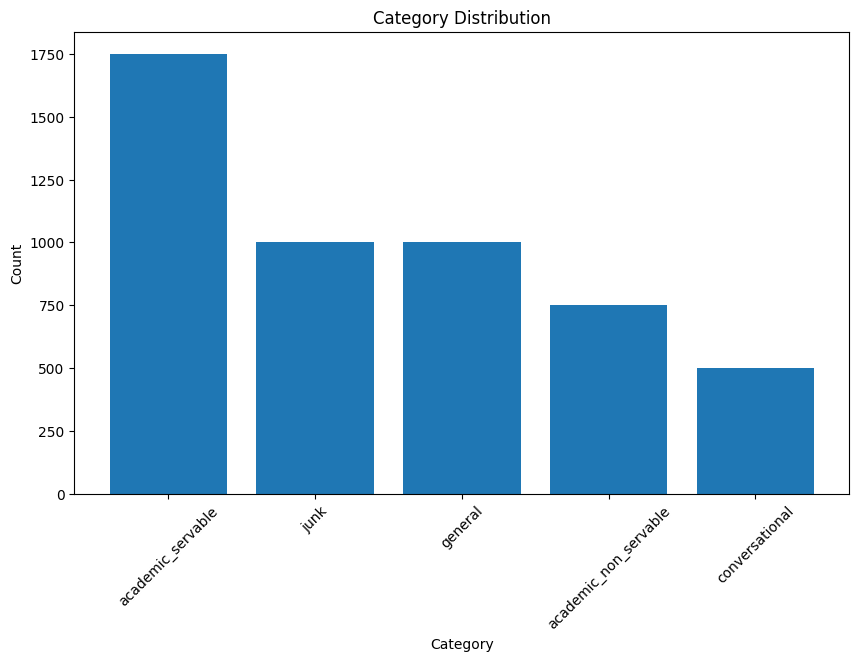

In [4]:
import matplotlib.pyplot as plt

category_counts = data['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

In [6]:
X = data['query_text']
y = data['category']

**Tokenization and Padding**

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

max_length = 100
X_padded = pad_sequences(X_seq, maxlen=max_length, padding='post')

In [8]:
data.head()

,unique ID,query_text,category
0,0,HTTPS://VIMEO.COM/107297364﻿,4
1,1,Art and Culture,3
2,2,Differentiate between chemical and biological ...,1
3,3,nth Term of an AP,1
4,4,bunmei kaika: aoiza ibunroku saien,4


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

**Handling Imbalance**

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**RNN Model**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1217100   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          117248    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 5)                 1

**Training the Model**

In [13]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
111/111 [==============================] - 24s 158ms/step - loss: 1.4900 - accuracy: 0.2836 - val_loss: 1.3597 - val_accuracy: 0.3170
Epoch 2/50
111/111 [==============================] - 12s 108ms/step - loss: 1.3283 - accuracy: 0.3677 - val_loss: 1.3553 - val_accuracy: 0.3190
Epoch 3/50
111/111 [==============================] - 9s 80ms/step - loss: 1.3202 - accuracy: 0.3715 - val_loss: 1.3836 - val_accuracy: 0.3580
Epoch 4/50
111/111 [==============================] - 6s 54ms/step - loss: 1.3186 - accuracy: 0.3827 - val_loss: 1.3666 - val_accuracy: 0.3590
Epoch 5/50
111/111 [==============================] - 6s 52ms/step - loss: 1.3122 - accuracy: 0.3863 - val_loss: 1.3431 - val_accuracy: 0.3650
Epoch 6/50
111/111 [==============================] - 4s 34ms/step - loss: 1.3127 - accuracy: 0.3776 - val_loss: 1.3575 - val_accuracy: 0.3180
Epoch 7/50
111/111 [==============================] - 3s 28ms/step - loss: 1.3113 - accuracy: 0.3812 - val_loss: 1.3601 - val_accuracy: 0.

**Evaluating the Model**

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

32/32 [==============================] - 0s 8ms/step - loss: 2.1980 - accuracy: 0.5480
Loss: 2.198007822036743, Accuracy: 0.5479999780654907


**Predict on test data**

In [15]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Mk/Projects/Cpy Datasets/test.csv')
test_data

,unique ID,query_text
0,0,yes
1,1,If x = a 2 b 3 c 4 and y = a b 4 c 2 find the ...
2,2,x + 7y=10;3x - 2y=7
3,3,Given tan β = cos θ tan α \[ \begin{array}{l} ...
4,4,Identify the chiral molecule from the following.
...,...,...
995,995,How are rainbow formed?
996,996,"Consider the sequence a 1 , a 2 , a 3 , ... su..."
997,997,Hy
998,998,Why Dentist use Concave Mirror?


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_test_new = test_data['query_text']

X_test_new_seq = tokenizer.texts_to_sequences(X_test_new)

X_test_new_padded = pad_sequences(X_test_new_seq, maxlen=max_length, padding='post')

predictions = model.predict(X_test_new_padded)

predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=1))

test_data['predicted_category'] = predicted_categories

32/32 [==============================] - 1s 5ms/step


In [17]:
unique_ids = test_data['unique ID']

results_df = pd.DataFrame({'unique ID': unique_ids, 'category': predicted_categories})

results_df.to_csv('submission.csv', index=False)